# Практикум Python


<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" align="right" style="height: 200px;"/>

# Занятие 15. Символьные вычисления. SymPy

Полезные материалы:
- [Документация по SymPy](https://docs.sympy.org/latest/index.html)
- [Установка SymPy](https://docs.sympy.org/latest/install.html)
- [github](https://github.com/sympy) 
- [Левый туториал с ютуба (для любителей английского)](https://www.youtube.com/watch?v=VKOYjemQRqw&list=PLSE7WKf_qqo1T5VV1nqXTj2iNiSpFk72T&ab_channel=TMQuest)
- [Для общего развития, доклад(2013 год)](https://www.youtube.com/watch?v=Jtt9hexk93o&list=RDQMpIx5sgZrsA0&start_radio=1&ab_channel=Enthought)
- [мемные видосики](https://www.youtube.com/playlist?list=PLkdGijFCNuVmu35l6EJxdvsvf7xj4EQVf)

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp

%matplotlib inline

### Этапы изучения SymPy
 1. Введение в SymPy
 2. Объявление переменных, константы, комплексные числа \
    2.1. Объявление переменных, константы, комплексные числа \
    2.2. Операции над выражениями \
    2.3. Подстановка ```subs``` \
    2.4. Конвертация текста \
    2.5. Вычисление ```evalf```
 3. Операции над выражениями
 4. Типы данных в SymPy
 5. Решение простых уравнений
 6. Производные \
     6.1. Дифференцирование \
     6.2. Преобразующие функции для упрощения \
     6.3. Частные производные
 7. Интегралы
 8. Пределы и Ряды \
    8.1. Пределы \
    8.2. Ряды
 9. Обыкновенные дифференциальные уравнения
 10. Лямбды и рисование графиков
 11. Структура выражений, аналогичные операции
 12. Линейная алгебра
 13. Немного физики, посмотрите может интересно 

## Введение

**Что такое символьные вычисления?**

Символьные вычисления имеют дело с вычислением математических объектов символически. Это означает, что математические объекты представляются точно, а не приблизительно, а математические выражения с невычисленными переменными оставляются в символьной форме.

**Несколько примеров:**

 Вычислим
 - $\sqrt{9}$
 - $\sqrt{8}$
 - $\log_{2}{4}$
 - $\log_{2}{6}$

In [2]:
# пример 1
print(f'числовое вычисление: {math.sqrt(9)}\t\t символьное вычисление: {sp.sqrt(9)}')

# пример 2
print(f'числовое вычисление: {math.sqrt(8)}\t символьное вычисление: {sp.sqrt(8)}')

# пример 3
print(f'числовое вычисление: {math.log(4, 2)}\t\t символьное вычисление: {sp.log(4, 2)}')

# пример 4
print(f'числовое вычисление: {math.log(2, 6)}\t символьное вычисление: {sp.log(2, 6)}')

числовое вычисление: 3.0		 символьное вычисление: 3
числовое вычисление: 2.8284271247461903	 символьное вычисление: 2*sqrt(2)
числовое вычисление: 2.0		 символьное вычисление: 2
числовое вычисление: 0.3868528072345416	 символьное вычисление: log(2)/log(6)


Посмотрим ещё примеры, только теперь рассмотрим выражение:
$$
x^2y + 2xy^2 + (1-x)^2 + 4\sin x\cos x, 
$$
Видим зависимость от двух переменных $x, y$.
Задача такова: упростите данное выражение.

Упростили на листочке? Вам должно быть лень, ведь мы физтехи. Упростим халявно.
Вот мы и дошли до первого пункта плана, объявление переменных.

#### Объявление математических переменных, константы, комплексные числа

В данном случае нам нужна математическая переменная, поэтому возьмём её из SymPy.

In [3]:
# объявление переменной 'x'
x = sp.symbols('x')
type(x)

sympy.core.symbol.Symbol

In [4]:
# объявление переменной 'y'
y = sp.symbols('y')

# обозначим выражение, теперь уже отказавшись от функций math.
# Используем только SymPy.
expr = x**2*y - y**2 + 2*x*y + (x-y)**2 + 4*sp.sin(x)*sp.cos(x)
expr

x**2*y + 2*x*y - y**2 + (x - y)**2 + 4*sin(x)*cos(x)

In [5]:
sp.simplify(expr)

x**2*y + x**2 + 2*sin(2*x)

Что за магия произошла выше? Мы познакомились с первым инструментом в наших руках - simplify, используется для упрощения выражений, каждый инструмент имеет огромный набор применений и особенностей, чтобы познакомиться с ними идём в документацию или Яндекс в помощь)))
Так теперь посмотрим на удобные способы объявления переменных, допустим через $','$, тут ещё можно писать греческие символы!

In [6]:
# С точки зрения кодстайла так НЕ ДЕЛАЕМ.
# Объявления должны быть читаемы
# и иногда полезно комментировать, какую смысловую нагрузку несёт переменная
a, b, c, d, n, z, alpha, beta, Sigma = sp.symbols('a b c d n z alpha beta Sigma_123^3')
Sigma # это переменная!

Sigma_123^3

In [7]:
# Важно!
print(Sigma)

Sigma_123^3


Как мы видим выше print не отображает переменные SymPy, поэтому пользуемся отображением через передачу объекта интерпретатору.


Так же символы могут иметь некоторые свойства, допустим быть положительными или иметь какой-то конкретный тип

In [8]:
y = sp.symbols('y', positive=True)

Ещё один интересный способ задать набор переменных

In [9]:
x_v = sp.symbols("x0:10")
x_v

(x0, x1, x2, x3, x4, x5, x6, x7, x8, x9)

In [10]:
# обращение к элементу из набора по обычной индексации
x_v[1]

x1

Поговорим немного о константах в SymPy. Основные:

In [11]:
sp.pi

pi

In [12]:
sp.E

E

In [13]:
sp.oo

oo

In [14]:
sp.oo - sp.oo

nan

В SymPy можно работать в комплексных числах для этого используем ```sp.im() sp.re()```

In [15]:
sp.I

I

Уточняем кол-во цифр через ```evalf```

In [16]:
sp.pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

SymPy умеет ещё круче, он может точно считать целые, рациональные и иррациональные числа. Для этого существуют соответсвующие классы.

In [17]:
# первый аргумент - числитель, второй - знаменатель
sp.Rational(5, 7)

5/7

In [18]:
sp.Rational(10, 9) + sp.Rational(8, 3)

34/9

In [19]:
x = sp.Rational(5, 7)

# если привести 5 / 7 к integer это 0, т.к. целая часть 0.
sp.Integer(x)

0

In [20]:
x = sp.Rational(10, 9) + sp.Rational(8, 3)

# целая часть от деления будет 3
sp.Integer(x)

3

#### Равенство двух выражений

Знак `==` соответствует полному совпадению выражений:

In [59]:
# равенство с точностью до символа
x = sp.symbols('x')
(x+2)**2 == (x+2)**2

True

In [60]:
(x + 1) * (x + 2) / x == (x + 2) * (1 + 1 / x)

False

Чтобы сравнить два выражения на равенство стоит использовать метод `equals`:

In [26]:
f1 = (x+2)**2
f2 = x**2 + 4*x + 4

In [27]:
f1.equals(f2)

True

#### Подстановка `subs`

Вместо любой символьной переменной и даже вместо выражения можно подставить другое выражение:

In [29]:
y, x = sp.symbols('y x')

In [30]:
# вместо x подставим 0
sp.sin(2*x).subs(x, 0)

0

In [31]:
# вместо x подставим 2y
sp.sin(2*x).subs(x, 2*y)

sin(4*y)

In [32]:
# можно подставлять числа вместо выражений
(x + y).subs(x + y, 7)

7

In [33]:
# можно задавать замены dict'ом
(x + y).subs({x: 1, y: 2})

3

#### Конвертация
Для быстрой конвертации текста используем
```sympify```

In [34]:
sp.sympify('2*x*y + sqrt(2) + 1/3 - z')

2*x*y - z + 1/3 + sqrt(2)

#### Вычисление ```evalf``` и ```N```
Для быстрого вычисления приблизительного результата используем ```evalf```

In [35]:
((sp.sqrt(5)+1)/2).evalf(50)

1.6180339887498948482045868343656381177203091798058

In [36]:
expr = x**2 + sp.pi
expr

x**2 + pi

In [37]:
# функция аналогичная evalf
sp.N(expr)

x**2 + 3.14159265358979

### Операции над выражениями

Упрощение. SymPy упрощает везде и всегда. Допустим просто напишем выражение

In [38]:
2*y - y + 5

y + 5

In [39]:
2*y / 6

y/3

In [40]:
y/y

1

Предположим у нас было выражение вида:

In [41]:
x = sp.symbols('x')
expr = x**2 + 2*x
expr.simplify()

x*(x + 2)

In [42]:
expr.expand()

x**2 + 2*x

Получается операция ```expand``` это раскрытие скобочек! Полная противоположность simplify.

Ещё одно полезное преобразование ```factor```.

In [43]:
expr = x**2 + 2*x - 15
expr

x**2 + 2*x - 15

In [44]:
expr.factor()

(x - 3)*(x + 5)

Степень многочлена expr по x

In [45]:
sp.degree(expr, x)

2

Рассмотрим выражение большей степени

In [46]:
expr = (x + y - z)**6
expr

(x + y - z)**6

In [47]:
expr = sp.expand(expr)
expr

x**6 + 6*x**5*y - 6*x**5*z + 15*x**4*y**2 - 30*x**4*y*z + 15*x**4*z**2 + 20*x**3*y**3 - 60*x**3*y**2*z + 60*x**3*y*z**2 - 20*x**3*z**3 + 15*x**2*y**4 - 60*x**2*y**3*z + 90*x**2*y**2*z**2 - 60*x**2*y*z**3 + 15*x**2*z**4 + 6*x*y**5 - 30*x*y**4*z + 60*x*y**3*z**2 - 60*x*y**2*z**3 + 30*x*y*z**4 - 6*x*z**5 + y**6 - 6*y**5*z + 15*y**4*z**2 - 20*y**3*z**3 + 15*y**2*z**4 - 6*y*z**5 + z**6

In [48]:
sp.collect(expr, x)

x**6 + x**5*(6*y - 6*z) + x**4*(15*y**2 - 30*y*z + 15*z**2) + x**3*(20*y**3 - 60*y**2*z + 60*y*z**2 - 20*z**3) + x**2*(15*y**4 - 60*y**3*z + 90*y**2*z**2 - 60*y*z**3 + 15*z**4) + x*(6*y**5 - 30*y**4*z + 60*y**3*z**2 - 60*y**2*z**3 + 30*y*z**4 - 6*z**5) + y**6 - 6*y**5*z + 15*y**4*z**2 - 20*y**3*z**3 + 15*y**2*z**4 - 6*y*z**5 + z**6

Функция ```collect``` собирает члены с определенными степенями x

Пусть у нас есть большая дробь, где числитель и знаменатель многочелны.

In [49]:
p = x**3 + 10*x**2 + 31*x + 30
q = x**2 + 12*x + 35
fraction = p / q
fraction

(x**3 + 10*x**2 + 31*x + 30)/(x**2 + 12*x + 35)

In [50]:
#сократим дродь
fraction.cancel()

(x**2 + 5*x + 6)/(x + 7)

In [51]:
#выделим целую часть
fraction.apart()

x - 2 + 20/(x + 7)

In [52]:
a = y/(x-y) + x/(x+y)
a

x/(x + y) + y/(x - y)

Чтобы привести их к общему знаменателю используем ```together()```

In [53]:
sp.together(a)

(x*(x - y) + y*(x + y))/((x - y)*(x + y))

Рассмотрим ```trigsimp()```, он пытается успростить тригонометрическое выражение.

In [54]:
expr = 2*sp.sin(x)**2+3*sp.cos(x)**2
expr

2*sin(x)**2 + 3*cos(x)**2

In [55]:
sp.trigsimp(expr)

cos(x)**2 + 2

In [56]:
sp.expand_trig(expr)

2*sin(x)**2 + 3*cos(x)**2

Так же мы можем поменять x и y местами, использовав simultaneous в subs, это ключевой параметр для одновременной подстановки.

In [57]:
a=2*x*y**2
a

2*x*y**2

In [58]:
a.subs([(x,y),(y,x)], simultaneous=True)

2*x**2*y

### Типы данных в SymPy 

In [61]:
x = sp.Symbol('x')
expr = x**(1/3)
expr

x**0.333333333333333

С какой проблемой мы столкнулись? Вроде вычисления символьные, а степень нет!
Как исправить? Обсуждали ранее типы данных ```sp.Integer```, ```sp.Rational``` и т. д.

In [62]:
x = sp.Symbol('x')
expr = x**(sp.Integer(1)/sp.Integer(3))
expr

x**(1/3)

In [63]:
x = sp.Symbol('x')
expr = x**(sp.Integer(1)/3)
expr

x**(1/3)

Сработало приведение типов.

In [64]:
type(sp.Integer(1)/3)

sympy.core.numbers.Rational

Иногда полезно посмотреть тип объекта через ```type()```, чтобы понять, что с ним можно делать

### Решение простых уравнений

Знак равенства в SymPy никак не зарезервирован(

In [65]:
a,b,c,d,e,f=sp.symbols('a b c d e f')

In [66]:
# для задания как таковых "символьных" равенств используем 'Eq'
eq = sp.Eq(x**2, 5)
eq

Eq(x**2, 5)

In [67]:
type(eq)

sympy.core.relational.Equality

Как видим выше, пользуемся ```Eq```

#### Решение уравнений

Используем метод ```solveset()``` для решения уравнения

In [68]:
sp.solveset(eq)

{-sqrt(5), sqrt(5)}

In [69]:
type(sp.solveset(eq))

sympy.sets.sets.FiniteSet

In [70]:
list(sp.solveset(eq))

[sqrt(5), -sqrt(5)]

In [71]:
sp.solveset(x**2-5, x) # второй аргумент задает, относительно чего решаем

{-sqrt(5), sqrt(5)}

Второй пример уравнения

In [72]:
eq2 = sp.Eq(sp.cos(x)-sp.sin(x), 0)
eq2

Eq(-sin(x) + cos(x), 0)

In [73]:
sp.solveset(eq2)

Union(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/4), Integers))

In [74]:
type(sp.solveset(eq2))

sympy.sets.sets.Union

Третий пример

In [76]:
eq3 = sp.Eq(sp.cos(x), x)
eq3

Eq(cos(x), x)

In [77]:
type(sp.solveset(eq3))

sympy.sets.conditionset.ConditionSet

Решаем систему линейных уравнений

In [78]:
eq_lin1 = sp.Eq(x, 3*y + z)
eq_lin1

Eq(x, 3*y + z)

In [79]:
eq_lin2 = sp.Eq(5*x - 3*z, y)
eq_lin2

Eq(5*x - 3*z, y)

In [80]:
sp.linsolve([eq_lin1, eq_lin2], x, y, z)

{(4*z/7, -z/7, z)}

In [81]:
sp.solve([a * x + b * y - e, c * x + d * y - f],[x, y])

{x: (-b*f + d*e)/(a*d - b*c), y: (a*f - c*e)/(a*d - b*c)}

Функция ```roots()``` возвращает корни многочлена с их множественностями

In [82]:
sp.roots(x**3-3*x+2,x)

{-2: 1, 1: 2}

 ### Производные

In [83]:
expr = sp.exp(2 * x) + sp.sin(x)
expr

exp(2*x) + sin(x)

Задача продифференцировать это выражение решается так

In [84]:
sp.diff(expr)

2*exp(2*x) + cos(x)

Можно уточнить переменную дифференцирования

In [85]:
sp.diff(expr, x)

2*exp(2*x) + cos(x)

In [86]:
# вторая производная
sp.diff(sp.diff(expr))

4*exp(2*x) - sin(x)

In [87]:
sp.diff(expr, x, x)

4*exp(2*x) - sin(x)

Но нормальные люди пишут так:

In [88]:
sp.diff(expr, x, 4)

16*exp(2*x) + sin(x)

#### Преобразующие функции для упрощения

In [89]:
expr = sp.exp(sp.sinh(x)) / sp.exp(sp.exp(x) / 2)
expr

exp(-exp(x)/2)*exp(sinh(x))

In [90]:
expo = expr.rewrite(sp.sin)
expo

(-sinh(sinh(x)/2 + cosh(x)/2) + cosh(sinh(x)/2 + cosh(x)/2))*(sinh(sinh(x)) + cosh(sinh(x)))

In [91]:
expr.rewrite(sp.exp)

exp(exp(x)/2 - exp(-x)/2)*exp(-exp(x)/2)

Иногда надо переписать по-другому, чтобы упростить

In [92]:
expr.simplify()

exp(-exp(x)/2 + sinh(x))

In [93]:
expo.simplify()

exp(-exp(-x)/2)

#### Частные производные

In [94]:
two_var = sp.cos(x) * sp.cot(2 * y) ** 2
two_var

cos(x)*cot(2*y)**2

In [95]:
partial_y = two_var.diff(y)
partial_y

(-4*cot(2*y)**2 - 4)*cos(x)*cot(2*y)

In [96]:
partial_y.rewrite(sp.sin)

(-4 - sin(4*y)**2/sin(2*y)**4)*sin(4*y)*sin(x + pi/2)/(2*sin(2*y)**2)

In [97]:
simplified_y = partial_y.simplify()
simplified_y

-4*cos(x)*cot(2*y)/sin(2*y)**2

In [98]:
simplified_y.rewrite(sp.sin)

-2*sin(4*y)*sin(x + pi/2)/sin(2*y)**4

Дифференцировать можно с разным порядком и по разным переменным

In [99]:
two_var.diff(x, x, y, y, y)

64*(cot(2*y)**2 + 1)*(3*cot(2*y)**2 + 2)*cos(x)*cot(2*y)

In [100]:
two_var.diff(x, 4, y, 5)

-512*(cot(2*y)**2 + 1)*(17*(cot(2*y)**2 + 1)**2 + 26*(cot(2*y)**2 + 1)*cot(2*y)**2 + 2*cot(2*y)**4)*cos(x)*cot(2*y)

### Интегралы

In [101]:
x, y, z = sp.symbols('x y z', real=True)
C = sp.Symbol('C')

In [102]:
f = sp.cos(2*x) * sp.sin(3*x)
f

sin(3*x)*cos(2*x)

In [103]:
sp.integrate(f)

-2*sin(2*x)*sin(3*x)/5 - 3*cos(2*x)*cos(3*x)/5

Аналогично дифференциоранию можно уточнять переменную интегрирования

In [104]:
sp.integrate(f, x)

-2*sin(2*x)*sin(3*x)/5 - 3*cos(2*x)*cos(3*x)/5

Разберем необычный кейс

In [105]:
g = x ** y
g

x**y

In [106]:
h = sp.integrate(g, x)
h

Piecewise((x**(y + 1)/(y + 1), Ne(y, -1)), (log(x), True))

Впервые получаем систему, как с ней работать?

In [107]:
type(h)

Piecewise

In [108]:
(h * f).simplify()

Piecewise((x**(y + 1)*sin(3*x)*cos(2*x)/(y + 1), Ne(y, -1)), (log(x)*sin(3*x)*cos(2*x), True))

Отсюда становится понятно, что теперь все действия происходят одновременно со всей системой.

In [109]:
f

sin(3*x)*cos(2*x)

Рассмотрим интегрирование в некоторых пределах, тогда мы можем вычислить интеграл

In [110]:
sp.integrate(f, (x, 0, sp.pi))

6/5

In [111]:
u = sp.exp(-x)
u

exp(-x)

In [112]:
sp.integrate(u, (x, 0, sp.oo))

1

In [113]:
w = x * y * z ** 2
w

x*y*z**2

можно интегрировать по разным переменным в том порядке, как хотим

In [114]:
sp.integrate(w, x ,y)

x**2*y**2*z**2/4

In [115]:
sp.integrate(w, (x, 0, 1), (y, 1, 5), (z, 0, 3))

54

Давайте, как пример, посчитаем интеграл Пуассона:

In [116]:
expr = sp.E ** (-(x**2) / 2)
expr

exp(-x**2/2)

In [117]:
expr.integrate()

sqrt(2)*sqrt(pi)*erf(sqrt(2)*x/2)/2

${\rm erfi}\, x$ - это так называемая *функция ошибок*. По определению, она равна
$$
{\rm erfi}\, x =
\frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2} dt.
$$

### Пределы и ряды

In [119]:
x = sp.Symbol('x')

In [120]:
expr = x ** 2
expr

x**2

Посчитаем предел при $x -> 1$

In [121]:
sp.limit(expr, x , 1)

1

In [122]:
expr.subs(x, 1)

1

In [124]:
exponential = x / sp.exp(x)
exponential

x*exp(-x)

Иногда может так случаться, что предел существует, а при подстановке всё грустно(

In [125]:
sp.limit(exponential, x, sp.oo)

0

In [126]:
exponential.subs(x, sp.oo)

nan

In [127]:
expr = 1/x
expr

1/x

Примите, как факт, что по умолчанию предел берется справа

In [128]:
sp.limit(expr, x, 0)

oo

Чтобы задать левый - или правый + пределы нужно через ',' указать знак

In [129]:
sp.limit(expr, x, 0, '-')

-oo

In [130]:
sp.limit(expr, x, 0, '+-')

zoo

#### Ряды

Наше любимое разложение в ряд Маклорена, Тейлора

In [131]:
sp.series(sp.sin(x), x, sp.pi/2)

1 - (x - pi/2)**2/2 + (x - pi/2)**4/24 + O((x - pi/2)**6, (x, pi/2))

In [132]:
expr = sp.exp(sp.sin(x))
expr

exp(sin(x))

Можно указывать до какого члена

In [133]:
sp.series(expr, x, 0, n=8)

1 + x + x**2/2 - x**4/8 - x**5/15 - x**6/240 + x**7/90 + O(x**8)

С рядами легальны математические операции

In [134]:
(sp.series(expr, x, 0, n=8) * sp.series(expr, x, 0, n=6)).expand()

1 + 2*x + 2*x**2 + x**3 - 23*x**5/60 + O(x**6)

Их так же можно дифференцировать и интегрировать

In [136]:
sp.diff(sp.series(expr, x, 0, n=8))

1 + x - x**3/2 - x**4/3 - x**5/40 + 7*x**6/90 + O(x**7)

In [137]:
sp.integrate(sp.series(expr, x, 0, n=8)).removeO()

x**8/720 - x**7/1680 - x**6/90 - x**5/40 + x**3/6 + x**2/2 + x

Рассмотрим суммирование рядов через ```summation()```

In [138]:
sp.summation(1/n**2,(n,1,sp.oo))

pi**2/6

In [139]:
sp.summation((-1)**n/n**2,(n,1,sp.oo))

-pi**2/12

Невычисленная сумма обозначается Sum.

In [140]:
a=sp.Sum(x**n/sp.factorial(n),(n,0,sp.oo))
sp.Eq(a,a.doit())

Eq(Sum(x**n/factorial(n), (n, 0, oo)), exp(x))

**Пример**
Аппрoксимация $sin(x)$ отрезком ряда Тейлора.

x
-x**3/6 + x
x**5/120 - x**3/6 + x
-x**7/5040 + x**5/120 - x**3/6 + x
x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


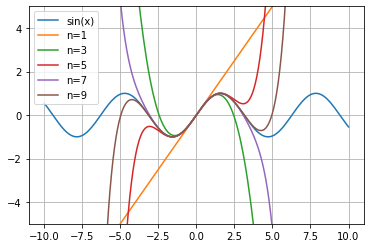

In [141]:
fun = sp.sin(x)
fun_lambda = sp.lambdify(x, fun)

xx = np.linspace(-10, 10, 200)
plt.plot(xx, fun_lambda(xx), label=str(fun))
plt.grid()
plt.ylim([-5, 5])

for n in range(2, 11, 2):
    tailor = fun.series(n=n).removeO()
    tailor_lambda = sp.lambdify(x, tailor)
    print(tailor)
    plt.plot(xx, tailor_lambda(xx), label='n='+str(n-1))
    
plt.legend()  
pass

### Обыкновенные дифференциальные уравнения

Решим:

$x*f''(x) + f'(x) = x^3$

$f(1)=0$

$f'(2)=1$

В данном случае изучим ещё один тип в SymPy - функции

In [142]:
x = sp.Symbol('x')

In [143]:
f = sp.Function("f")(x)
f

f(x)

In [144]:
f.diff()

Derivative(f(x), x)

In [145]:
f.integrate()

Integral(f(x), x)

Как и раньше задаем равенство

In [146]:
diff_eq = sp.Eq(x * f.diff(x, 2) + f.diff(x), x**3)
diff_eq

Eq(x*Derivative(f(x), (x, 2)) + Derivative(f(x), x), x**3)

Можно запрашивать как левую, так и правую часть уравнения

In [147]:
diff_eq.rhs

x**3

In [148]:
diff_eq.lhs

x*Derivative(f(x), (x, 2)) + Derivative(f(x), x)

Для нахождения решения используется ```dsolve()```

In [149]:
sol = sp.dsolve(diff_eq, f)
sol

Eq(f(x), C1 + C2*log(x) + x**4/16)

In [150]:
type(sol)

sympy.core.relational.Equality

In [151]:
exp = sol.rhs
exp

C1 + C2*log(x) + x**4/16

Для определения свободных переменных можно воспользоваться ```free_symbols```

In [152]:
exp.free_symbols

{C1, C2, x}

In [153]:
C1, C2, _ = tuple(exp.free_symbols)
# то, что произошло выше называется распаковкой элементов
C1

C1

Можно вычислять выражения подставляя в свободные переменные

In [154]:
exp.subs(C1, 0).subs(C2, 1)

1/16

In [155]:
exp.subs({C1: 0, C2: 1})

1/16

Зададим начальные условия через специальный синтаксис

In [156]:
ics = {f.subs(x,1): 0, f.diff().subs(x,2): 1}
ics

{f(1): 0, Subs(Derivative(f(x), x), x, 2): 1}

Теперь мы можем решить уравнение с подстановкой условий

In [157]:
ivp = sp.dsolve(diff_eq, ics=ics).rhs
ivp

x**4/16 - 2*log(x) - 1/16

Проверим себя, подставив точки из условия

In [158]:
ivp.subs(x, 1)

0

In [159]:
ivp.diff().subs(x,2)

1

In [160]:
(x * ivp.diff(x, 2) + ivp.diff()).simplify()

x**3

### Лямбды и Рисование графиков

Еще одна прикольная и полезная штука ```lambdified```

In [161]:
expr = sp.pi * x ** 2 + 5 * x + sp.E
lambdified_expr = sp.lambdify(x, expr)
lambdified_expr 

<function _lambdifygenerated(x)>

In [162]:
expr

pi*x**2 + 5*x + E

Иначе говоря теперь это вычислимая в не символьных вычислениях функция

In [163]:
lambdified_expr(3)

45.99261571076719

Заметим что мы рассмотрели квадратное уравнение, значит парабола, проверим это

In [164]:
import numpy as np

In [165]:
points = np.linspace(-20, 20, 1000)

Теперь передав множество точек, мы получим значения этих точек после навешивания функции

In [166]:
lambdified_expr(points)

array([1.15935534e+03, 1.15452900e+03, 1.14971273e+03, 1.14490653e+03,
       1.14011041e+03, 1.13532436e+03, 1.13054838e+03, 1.12578248e+03,
       1.12102665e+03, 1.11628089e+03, 1.11154521e+03, 1.10681960e+03,
       1.10210406e+03, 1.09739860e+03, 1.09270321e+03, 1.08801789e+03,
       1.08334264e+03, 1.07867747e+03, 1.07402237e+03, 1.06937735e+03,
       1.06474240e+03, 1.06011752e+03, 1.05550271e+03, 1.05089798e+03,
       1.04630332e+03, 1.04171874e+03, 1.03714423e+03, 1.03257979e+03,
       1.02802542e+03, 1.02348113e+03, 1.01894691e+03, 1.01442276e+03,
       1.00990869e+03, 1.00540469e+03, 1.00091076e+03, 9.96426912e+02,
       9.91953132e+02, 9.87489425e+02, 9.83035792e+02, 9.78592231e+02,
       9.74158745e+02, 9.69735331e+02, 9.65321990e+02, 9.60918723e+02,
       9.56525529e+02, 9.52142408e+02, 9.47769361e+02, 9.43406387e+02,
       9.39053486e+02, 9.34710658e+02, 9.30377903e+02, 9.26055222e+02,
       9.21742614e+02, 9.17440079e+02, 9.13147617e+02, 9.08865229e+02,
      

In [167]:
type(lambdified_expr(points))

numpy.ndarray

In [168]:
output = lambdified_expr(points)

Построим график и убедимся, что это похоже на параболу

Text(0.5, 1.0, 'Parabola')

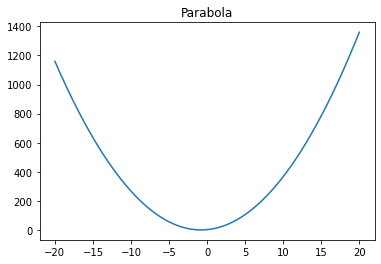

In [169]:
import seaborn as sns

sns.lineplot(x=points, y=output)
plt.title('Parabola')

Давайте дальше рисовать! SymPy использует matplotlib. Однако он распределяет точки по x адаптивно, а не равномерно.

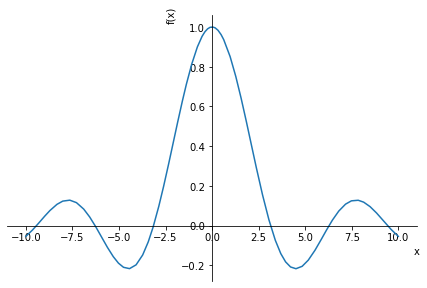

In [170]:
sp.plot(sp.sin(x)/x,(x,-10,10))

Можно нарисовать сразу несколько функций

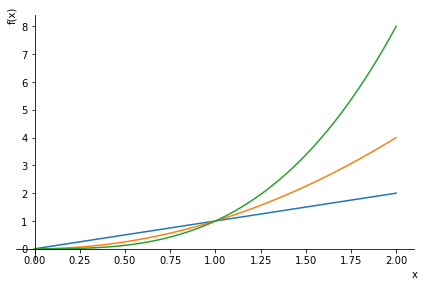

In [171]:
sp.plot(x,x**2,x**3,(x,0,2))

Другие функции надо импортировать из пакета sympy.plotting. 
**(ПРОСТО ПОСМОТРЕТЬ НА ЭТУ КРАСОТУ)**

In [172]:
from sympy.plotting import (plot_parametric,plot_implicit,
                            plot3d,plot3d_parametric_line,
                            plot3d_parametric_surface)

Параметрический график - фигура Лиссажу.

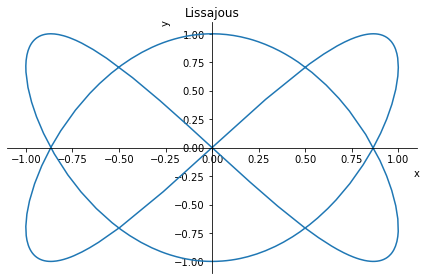

In [173]:
t=sp.Symbol('t')
plot_parametric(sp.sin(2*t),sp.cos(3*t),(t,0,2*sp.pi),
                title='Lissajous',xlabel='x',ylabel='y')

Неявный график - окружность.

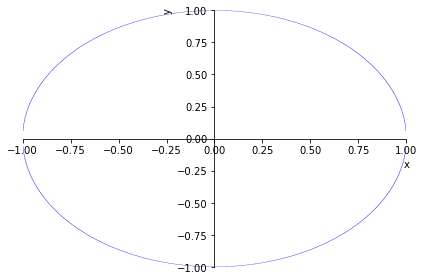

In [174]:
plot_implicit(x**2+y**2-1,(x,-1,1),(y,-1,1))

Поверхность. Если она строится не inline, а в отдельном окне, то её можно вертеть мышкой.

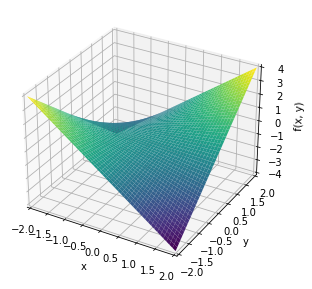

In [175]:
plot3d(x*y,(x,-2,2),(y,-2,2))

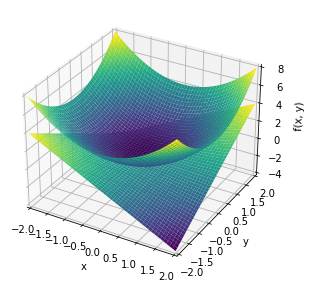

In [176]:
# несколько поверхностей
plot3d(x**2+y**2,x*y,(x,-2,2),(y,-2,2))

Параметрическая пространственная линия - спираль.

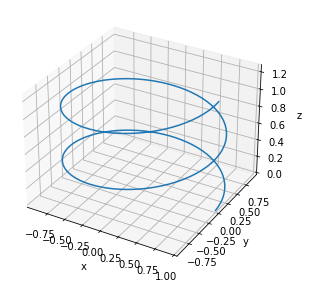

In [177]:
a=0.1
plot3d_parametric_line(sp.cos(t),sp.sin(t),a*t,(t,0,4*sp.pi))

Параметрическая поверхность - тор.

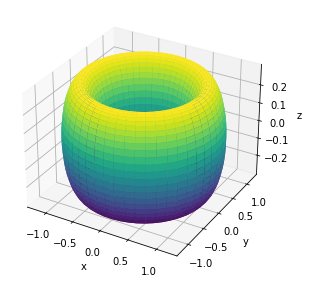

In [178]:
u,v=sp.symbols('u v')
a=0.3
plot3d_parametric_surface((1+a*sp.cos(u))*sp.cos(v),
                          (1+a*sp.cos(u))*sp.sin(v),a*sp.sin(u),
                          (u,0,2*sp.pi),(v,0,2*sp.pi))

### Структура выражений, аналогичные операции

Внутреннее представление выражения - это дерево. Функция srepr возвращает строку, представляющую его.

In [179]:
sp.srepr(x+1)

"Add(Symbol('x'), Integer(1))"

In [180]:
sp.srepr(x-y)

"Add(Symbol('x'), Mul(Integer(-1), Symbol('y', real=True)))"

In [181]:
sp.srepr(2*x*y/3)

"Mul(Rational(2, 3), Symbol('x'), Symbol('y', real=True))"

Вместо бинарных операций +, , * и т.д. можно использовать функции Add, Mul, Pow и т.д.

In [182]:
sp.Mul(x, sp.Pow(y,-1))

x/y

In [183]:
f = sp.Function('f')

sp.srepr(f(x, y))

"Function('f')(Symbol('x'), Symbol('y', real=True))"

### Линейная алгебра

In [184]:
a,b,c,d,e,f=sp.symbols('a b c d e f')

Матрицу можно построить из списка списков.

In [185]:
M=sp.Matrix([[a,b,c],[d,e,f]])
M

Matrix([
[a, b, c],
[d, e, f]])

In [186]:
M.shape

(2, 3)

Матрица может состоять только из строки или столбца.

In [187]:
sp.Matrix([[1,2,3]])

Matrix([[1, 2, 3]])

In [188]:
sp.Matrix([1,2,3])

Matrix([
[1],
[2],
[3]])

Построим матрицу из функции

In [189]:
def g(i,j):
    return sp.Rational(1,i+j+1)
sp.Matrix(3,3,g)

Matrix([
[  1, 1/2, 1/3],
[1/2, 1/3, 1/4],
[1/3, 1/4, 1/5]])

In [190]:
g=sp.Function('g')
M=sp.Matrix(3,3,g)
M

Matrix([
[g(0, 0), g(0, 1), g(0, 2)],
[g(1, 0), g(1, 1), g(1, 2)],
[g(2, 0), g(2, 1), g(2, 2)]])

In [191]:
M[1, 2]

g(1, 2)

In [192]:
M[1, 2] = 0
M

Matrix([
[g(0, 0), g(0, 1), g(0, 2)],
[g(1, 0), g(1, 1),       0],
[g(2, 0), g(2, 1), g(2, 2)]])

In [193]:
M[2, :]

Matrix([[g(2, 0), g(2, 1), g(2, 2)]])

In [194]:
M[:,1]

Matrix([
[g(0, 1)],
[g(1, 1)],
[g(2, 1)]])

In [195]:
M[0:2,1:3]

Matrix([
[g(0, 1), g(0, 2)],
[g(1, 1),       0]])

Создание базовых матриц

In [196]:
sp.eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [197]:
sp.zeros(3)

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [198]:
sp.zeros(2, 3)

Matrix([
[0, 0, 0],
[0, 0, 0]])

In [199]:
sp.diag(1, 2, 3)

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

In [200]:
M=sp.Matrix([[a,1],[0,a]])
sp.diag(1,M,2)

Matrix([
[1, 0, 0, 0],
[0, a, 1, 0],
[0, 0, a, 0],
[0, 0, 0, 2]])

Операции над матрицами

In [201]:
A=sp.Matrix([[a,b],[c,d]])
B=sp.Matrix([[1,2],[3,4]])
A+B

Matrix([
[a + 1, b + 2],
[c + 3, d + 4]])

In [202]:
A*B - B*A

Matrix([
[       3*b - 2*c, 2*a + 3*b - 2*d],
[-3*a - 3*c + 3*d,      -3*b + 2*c]])

In [203]:
sp.simplify(A**(-1))

Matrix([
[ d/(a*d - b*c), -b/(a*d - b*c)],
[-c/(a*d - b*c),  a/(a*d - b*c)]])

In [204]:
sp.det(A)

a*d - b*c

Собственные значения и векторы

In [205]:
x=sp.Symbol('x',real=True)

In [206]:
M=sp.Matrix([[(1-x)**3*(3+x),4*x*(1-x**2),-2*(1-x**2)*(3-x)],
          [4*x*(1-x**2),-(1+x)**3*(3-x),2*(1-x**2)*(3+x)],
          [-2*(1-x**2)*(3-x),2*(1-x**2)*(3+x),16*x]])
M

Matrix([
[  (1 - x)**3*(x + 3),       4*x*(1 - x**2), (3 - x)*(2*x**2 - 2)],
[      4*x*(1 - x**2),  -(3 - x)*(x + 1)**3, (2 - 2*x**2)*(x + 3)],
[(3 - x)*(2*x**2 - 2), (2 - 2*x**2)*(x + 3),                 16*x]])

Транспонирование матрицы

In [208]:
M.T

Matrix([
[  (1 - x)**3*(x + 3),       4*x*(1 - x**2), (3 - x)*(2*x**2 - 2)],
[      4*x*(1 - x**2),  -(3 - x)*(x + 1)**3, (2 - 2*x**2)*(x + 3)],
[(3 - x)*(2*x**2 - 2), (2 - 2*x**2)*(x + 3),                 16*x]])

In [209]:
M**(-1)

NonInvertibleMatrixError: Matrix det == 0; not invertible.

In [210]:
M.inv()

NonInvertibleMatrixError: Matrix det == 0; not invertible.

In [211]:
M**2

Matrix([
[ x**8 + 8*x**6 - 8*x**5 + 26*x**4 - 48*x**3 + 48*x**2 - 72*x + 45,                                    4*x**6 + 20*x**4 + 12*x**2 - 36,  2*x**7 + 2*x**6 + 10*x**5 + 10*x**4 + 6*x**3 + 6*x**2 - 18*x - 18],
[                                  4*x**6 + 20*x**4 + 12*x**2 - 36,   x**8 + 8*x**6 + 8*x**5 + 26*x**4 + 48*x**3 + 48*x**2 + 72*x + 45, -2*x**7 + 2*x**6 - 10*x**5 + 10*x**4 - 6*x**3 + 6*x**2 + 18*x - 18],
[2*x**7 + 2*x**6 + 10*x**5 + 10*x**4 + 6*x**3 + 6*x**2 - 18*x - 18, -2*x**7 + 2*x**6 - 10*x**5 + 10*x**4 - 6*x**3 + 6*x**2 + 18*x - 18,                                   8*x**6 + 56*x**4 + 120*x**2 + 72]])

In [212]:
sp.det(M)

0

Значит, у этой матрицы есть нулевое подпространство (она обращает векторы из этого подпространства в 0). Базис этого подпространства.

In [213]:
v=M.nullspace()
len(v)

1

Значит пространство одномерно

In [215]:
v=sp.simplify(v[0])
v

Matrix([
[-2/(x - 1)],
[ 2/(x + 1)],
[         1]])

In [216]:
sp.simplify(M*v)

Matrix([
[0],
[0],
[0]])

Собственные значения и их кратности.

In [217]:
M.eigenvals()

{-(x**2 + 3)**2: 1, (x**2 + 3)**2: 1, 0: 1}

Если нужны не только собственные значения, но и собственные векторы, то нужно использовать метод eigenvects. Он возвращает список кортежей. В каждом из них нулевой элемент - собственное значение, первый - его кратность, и последний - список собственных векторов, образующих базис (их столько, какова кратность).

In [218]:
v=M.eigenvects()
len(v)

3

In [219]:
for i in range(len(v)):
    v[i][2][0]=sp.simplify(v[i][2][0])
v

[(0,
  1,
  [Matrix([
   [-2/(x - 1)],
   [ 2/(x + 1)],
   [         1]])]),
 (-x**4 - 6*x**2 - 9,
  1,
  [Matrix([
   [      x/2 + 1/2],
   [(x + 1)/(x - 1)],
   [              1]])]),
 (x**4 + 6*x**2 + 9,
  1,
  [Matrix([
   [(x - 1)/(x + 1)],
   [      1/2 - x/2],
   [              1]])])]

In [220]:
for i in range(len(v)):
    z=M*v[i][2][0]-v[i][0]*v[i][2][0]
    print(sp.simplify(z))

Matrix([[0], [0], [0]])
Matrix([[0], [0], [0]])
Matrix([[0], [0], [0]])


ЖНФ - Жорданова нормальная форма

In [221]:
M=sp.Matrix([[sp.Rational(13,9),-sp.Rational(2,9),sp.Rational(1,3),sp.Rational(4,9),sp.Rational(2,3)],
          [-sp.Rational(2,9),sp.Rational(10,9),sp.Rational(2,15),-sp.Rational(2,9),-sp.Rational(11,15)],
          [sp.Rational(1,5),-sp.Rational(2,5),sp.Rational(41,25),-sp.Rational(2,5),sp.Rational(12,25)],
          [sp.Rational(4,9),-sp.Rational(2,9),sp.Rational(14,15),sp.Rational(13,9),-sp.Rational(2,15)],
          [-sp.Rational(4,15),sp.Rational(8,15),sp.Rational(12,25),sp.Rational(8,15),sp.Rational(34,25)]])
M

Matrix([
[ 13/9, -2/9,   1/3,  4/9,    2/3],
[ -2/9, 10/9,  2/15, -2/9, -11/15],
[  1/5, -2/5, 41/25, -2/5,  12/25],
[  4/9, -2/9, 14/15, 13/9,  -2/15],
[-4/15, 8/15, 12/25, 8/15,  34/25]])

Метод M.jordan_form() возвращает пару матриц, матрицу преобразования P и собственно жорданову форму J : M=PJP−1 

In [222]:
P,J=M.jordan_form()
J

Matrix([
[1, 0, 0,     0,     0],
[0, 2, 1,     0,     0],
[0, 0, 2,     0,     0],
[0, 0, 0, 1 - I,     0],
[0, 0, 0,     0, 1 + I]])

In [223]:
P=sp.simplify(P)
P

Matrix([
[-2, 10/9,   0, 5*I/12, -5*I/12],
[-2, -5/9,   0, -5*I/6,   5*I/6],
[ 0,    0, 4/3,   -3/4,    -3/4],
[ 1, 10/9,   0, -5*I/6,   5*I/6],
[ 0,    0,   1,      1,       1]])

In [224]:
Z=P*J*P**(-1)-M
sp.simplify(Z)

Matrix([
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0]])

Пример. Определитель Вандермонда

In [225]:
x0, x1, x2, x3 = sp.symbols('x0, x1, x2, x3')

In [226]:
W = sp.Matrix([
    [1, x0, x0**2],
    [1, x1, x1**2],
    [1, x2, x2**2]])
W

Matrix([
[1, x0, x0**2],
[1, x1, x1**2],
[1, x2, x2**2]])

In [227]:
W.det()

-x0**2*x1 + x0**2*x2 + x0*x1**2 - x0*x2**2 - x1**2*x2 + x1*x2**2

In [228]:
W.det().factor()

-(x0 - x1)*(x0 - x2)*(x1 - x2)

In [229]:
W = sp.Matrix([
    [1, x0, x0**2, x0**3],
    [1, x1, x1**2, x1**3],
    [1, x2, x2**2, x2**3],
    [1, x3, x3**2, x3**3]])
W

Matrix([
[1, x0, x0**2, x0**3],
[1, x1, x1**2, x1**3],
[1, x2, x2**2, x2**3],
[1, x3, x3**2, x3**3]])

In [230]:
W.det().factor()

(x0 - x1)*(x0 - x2)*(x0 - x3)*(x1 - x2)*(x1 - x3)*(x2 - x3)

### Немного физики

Пример. Уравнение осциллятора

In [231]:
y = sp.Function('y')
y

y

*Осциллятор* - это название математической модели, описывающей ряд физических процессов:
колебание математического маятника с малыми углами отклонения, колебания груза на пружине (оба: с учетом силы трения), LC-цепь и др. Процесс описывается уравнением:
$$
m \frac{d^2 y(t)}{dt^2} + \alpha\frac{d y(t)}{dt} + k y(t) = 0.
$$

In [232]:
m, alpha, k = sp.symbols('m, alpha, k')
diff_eq = m*y(t).diff(t, t) + alpha*y(t).diff(t) + k*y(t)
sp.Eq(diff_eq, 0)

Eq(alpha*Derivative(y(t), t) + k*y(t) + m*Derivative(y(t), (t, 2)), 0)

In [233]:
y_sol = sp.dsolve(diff_eq)
y_sol

Eq(y(t), C1*exp(t*(-alpha - sqrt(alpha**2 - 4*k*m))/(2*m)) + C2*exp(t*(-alpha + sqrt(alpha**2 - 4*k*m))/(2*m)))

Возьмем начальное условие $y(0)=1$, $y'(0)=0$:

In [234]:
y_sol = sp.dsolve(diff_eq, ics={y(0): 1, sp.diff(y(t), t).subs(t,0): 0})
y_sol

Eq(y(t), (-alpha/(2*sqrt(alpha**2 - 4*k*m)) + 1/2)*exp(t*(-alpha - sqrt(alpha**2 - 4*k*m))/(2*m)) + (alpha/(2*sqrt(alpha**2 - 4*k*m)) + 1/2)*exp(t*(-alpha + sqrt(alpha**2 - 4*k*m))/(2*m)))

In [235]:
y_sol.rhs

(-alpha/(2*sqrt(alpha**2 - 4*k*m)) + 1/2)*exp(t*(-alpha - sqrt(alpha**2 - 4*k*m))/(2*m)) + (alpha/(2*sqrt(alpha**2 - 4*k*m)) + 1/2)*exp(t*(-alpha + sqrt(alpha**2 - 4*k*m))/(2*m))

Обратите внимание, что значение подкоренного выражения в $\sqrt{\alpha^2 - 4km}$ может быть отрицательным. В этом случае сам корень чисто мнимый, однако результат всего выражения для $y(t)$ будет вещественным (мнимые части уничтожаются).

Построим график $y(t)$ для разных значения параметров $m$, $\alpha$, $k$:

<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-1/2*alpha/sqrt(alpha**2 - 4*k*m) + 1/2)*exp((1/2)*t*(-alpha - sqrt(alpha**2 - 4*k*m))/m) + ((1/2)*alpha/sqrt(alpha**2 - 4*k*m) + 1/2)*exp((1/2)*t*(-alpha + sqrt(alpha**2 - 4*k*m))/m)
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-1/2*alpha/sqrt(alpha**2 - 4*k*m) + 1/2)*exp((1/2)*t*(-alpha - sqrt(alpha**2 - 4*k*m))/m) + ((1/2)*alpha/sqrt(alpha**2 - 4*k*m) + 1/2)*exp((1/2)*t*(-alpha + sqrt(alpha**2 - 4*k*m))/m)
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-1/2*alpha/sqrt(alpha**2 - 4*k*m) + 1/2)*exp((1/2)*t*(-alpha - sqrt(alpha**2 - 4*k*m))/m) + ((1/2)*alpha/sqrt(alpha**2 - 4*k*m) + 1/2)*exp((1/2)*t*(-alpha + sqrt(alpha**2 - 4*k*m))/m)
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-1/2*alpha/sqrt(alpha**2 - 4*k*m) + 1/2)*exp((1/2)*t*(-alpha - sqrt(alpha**2 - 4*k*m))/m) + ((1/2)*alpha/sqr

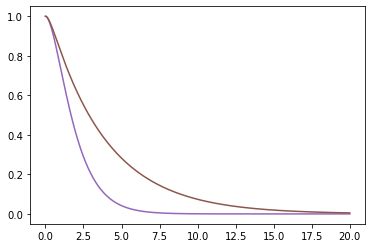

In [236]:
y_lambda = sp.lambdify((t, m, alpha, k), y_sol.rhs)
tt = np.linspace(0, 20, 500)
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=0))
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=.07))
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=.25))
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=1))
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=2.01))
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=4))
pass